# bad pixel correction

In [1]:
import glob
import getpass
import os
try:
    from astropy.io import fits as pf
except:
    import pyfits as pf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

from astropy.visualization import ZScaleInterval
interval= ZScaleInterval()

## Fix dead and hot pixels

make another image with median filtering (for example, by a pattern 3x3) and compute absolute value of differense between your image and filtered image. Substitute pixels of original image with big values of that difference (lets say, 100) by filtered values. Value of threshold you can get automatically by statistics of difference

In [14]:
from scipy.ndimage.filters import median_filter
from scipy.ndimage.filters import gaussian_filter
from scipy.signal import medfilt
import numpy as np

def remove_badpix(img, kernel_size, threshold=None, replace_neg=False):
    #footprint = np.ones((3,3)); footprint[1,1]=0
    #filtered=median_filter(img, 3, footprint)
    if replace_neg==True:
        img[img<=0]=0
    filtered=medfilt(img,kernel_size) #or filtered=gaussian_filter(img,sigma=2)
    difference=np.abs(img-filtered)
    if threshold is None:
        threshold = 10*np.median(difference)
    #determine the hot pixels location given the threshold 
    hot_pixels = np.nonzero((np.abs(difference[1:-1,1:-1])>threshold) )
    hot_pixels = np.array(hot_pixels) + 1 #because we ignored the first row and first column

    fixed_img = np.copy(img) 
    #replace hot pixels
    for y,x in zip(hot_pixels[0],hot_pixels[1]):
        fixed_img[y,x]=filtered[y,x]
    return fixed_img, filtered

img=pf.getdata(skysub_ch1[0])
fixed_img, filtered = remove_badpix(img, kernel_size=7)#,replace_neg=True);
difference= img - filtered

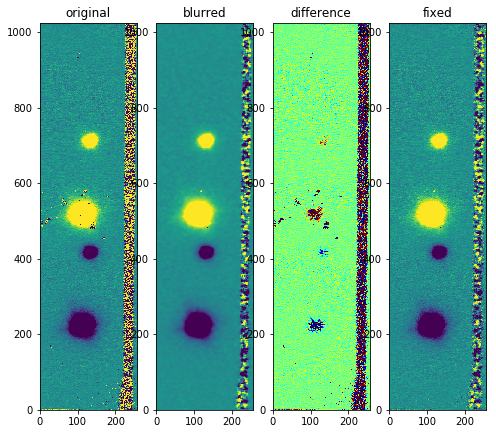

In [15]:
fig=plt.figure(figsize=(8,15))

vmin,vmax=interval.get_limits(fixed_img)
ax=plt.subplot(1,4,1)
ax.imshow(img,interpolation='nearest',origin='lower',vmin=vmin,vmax=vmax)
ax.set_title('original')
#
ax=plt.subplot(1,4,2)
ax.imshow(filtered,interpolation='nearest',origin='lower',vmin=vmin,vmax=vmax) #mask.
ax.set_title('blurred')
#
ax=plt.subplot(1,4,3)
ax3=ax.imshow(difference,interpolation='nearest',origin='lower',cmap='jet',vmin=vmin,vmax=vmax)
ax.set_title('difference')
#fig.colorbar(ax3,ax=ax)
ax=plt.subplot(1,4,4)
ax.imshow(fixed_img,interpolation='nearest',origin='lower',vmin=vmin,vmax=vmax)#,vmin=vmin,vmax=vmax,
ax.set_title('fixed')